# Question: are months impacting speed dating process?

#### Can we observed intra-annual fluctuations of decisions, match and date?
#### How do attributes importance or participant habits impacted the process?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. data meeting and preparation of the working dataframes

In [2]:
raw = pd.read_csv("src/Speed_Dating_Data.csv", encoding="ISO-8859-1")
raw.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [3]:
#raw.columns.tolist()

In [4]:
raw.describe(include="all")

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,...,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,283.675937,8.960248,0.500597,17.327166,1.828837,11.350919,16.872046,9.042731,9.295775,8.927668,...,7.240312,8.093357,8.388777,7.658782,7.391545,6.810020,7.615079,7.932540,7.155258,7.048611
std,158.583367,5.491329,0.500029,10.940735,0.376673,5.995903,4.358458,5.514939,5.650199,5.477009,...,1.576596,1.610309,1.459094,1.744670,1.961417,1.507341,1.504551,1.340868,1.672787,1.717988
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,4.000000,1.000000,1.000000
25%,154.000000,4.000000,0.000000,8.000000,2.000000,7.000000,14.000000,4.000000,4.000000,4.000000,...,7.000000,7.000000,8.000000,7.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000
50%,281.000000,8.000000,1.000000,16.000000,2.000000,11.000000,18.000000,8.000000,9.000000,8.000000,...,7.000000,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,7.000000,7.000000
75%,407.000000,13.000000,1.000000,26.000000,2.000000,15.000000,20.000000,13.000000,14.000000,13.000000,...,8.000000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,8.000000,8.000000


-> Disparity of 'round' value (number of met partner during a wave). This means that the order of meeting is not on the small scale over the wave

### adding categories

In [5]:
# mois en catégorie
raw['month'] = raw['wave'].apply(lambda x : 'october' if x in [1, 2, 12, 13, 14]
                                                      else 'november' if x in [3, 4, 5] 
                                                      else 'march' if x in [6, 7]
                                                      else 'april' if x in [8, 9, 18, 19, 20, 21]
                                                      else 'september' if x in [10, 11]
                                                      else 'february')

# mois en int
raw['month_int'] = raw['wave'].apply(lambda x : 10 if x in [1, 2, 12, 13, 14]
                                                      else 11 if x in [3, 4, 5] 
                                                      else 3 if x in [6, 7]
                                                      else 4 if x in [8, 9, 18, 19, 20, 21]
                                                      else 9 if x in [10, 11]
                                                      else 2)
display(raw.loc[2500, ["wave", "month"]])

wave         8
month    april
Name: 2500, dtype: object

In [6]:
# adding categories
raw["goal_c"] = raw["goal"].apply(lambda x : "fun" if x == 1
                                                    else "social" if x == 2
                                                    else "date" if x == 3
                                                    else "relationship" if x == 4
                                                    else "promise" if x == 5
                                                    else "other")

In [7]:
raw["gender"] = raw["gender"].apply(lambda x : "Women" if x == 1
                                                        else "Men")

### selection of the interesting variables

In [8]:
# extraction of the working variables (less time processing in the following script)
to_extract = ["iid", "gender", "age", "condtn", "wave", "month", "month_int", "goal", "goal_c", "position","date", "go_out",
              "positin1", "order", "partner", "pid", "age_o", "like",
              "expnum", "round", "dec_o", "match", "you_call", "them_cal", "date_3", "numdat_2", "satis_2", "length",
              "attr_o", "sinc_o", "intel_o", "fun_o", "amb_o", "shar_o",
              "attr1_1", "sinc1_1", "intel1_1", "fun1_1", "amb1_1", "shar1_1",
              "attr7_2", "sinc7_2", "intel7_2", "fun7_2", "amb7_2", "shar7_2",
              "attr1_2", "sinc1_2", "intel1_2", "fun1_2", "amb1_2", "shar1_2",
              "attr1_3", "sinc1_3", "intel1_3", "fun1_3", "amb1_3", "shar1_3",
              "attr7_3", "sinc7_3", "intel7_3", "fun7_3", "amb7_3", "shar7_3"]
tab = raw[to_extract]

In [9]:
display(tab.shape)
display(tab.head())
display(tab.describe(include="all"))

(8378, 64)

,iid,gender,age,condtn,wave,month,month_int,goal,goal_c,position,...,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3
0,1,Men,21.0,1,1,october,10,2.0,social,7,...,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Men,21.0,1,1,october,10,2.0,social,7,...,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1,Men,21.0,1,1,october,10,2.0,social,7,...,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1,Men,21.0,1,1,october,10,2.0,social,7,...,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1,Men,21.0,1,1,october,10,2.0,social,7,...,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN


,iid,gender,age,condtn,wave,month,month_int,goal,goal_c,position,...,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3
count,8378.000000,8378,8283.000000,8378.000000,8378.000000,8378,8378.000000,8299.000000,8378,8378.000000,...,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
unique,NaN,2,NaN,NaN,NaN,6,NaN,NaN,6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Women,NaN,NaN,NaN,april,NaN,NaN,fun,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4194,NaN,NaN,NaN,2574,NaN,NaN,3426,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,283.675937,NaN,26.358928,1.828837,11.350919,NaN,6.674147,2.122063,NaN,9.042731,...,19.411346,16.233415,10.898075,12.699142,31.330357,15.654266,16.679563,16.418155,7.823909,12.207837
std,158.583367,NaN,3.566763,0.376673,5.995903,NaN,3.410767,1.407181,NaN,5.514939,...,6.124502,5.163777,5.900697,6.557041,17.551540,9.336288,7.880088,7.231325,6.100502,8.615985
min,1.000000,NaN,18.000000,1.000000,1.000000,NaN,2.000000,1.000000,NaN,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,154.000000,NaN,24.000000,2.000000,7.000000,NaN,4.000000,1.000000,NaN,4.000000,...,16.670000,14.810000,5.000000,10.000000,20.000000,10.000000,10.000000,10.000000,0.000000,5.000000
50%,281.000000,NaN,26.000000,2.000000,11.000000,NaN,4.000000,2.000000,NaN,8.000000,...,20.000000,16.330000,10.000000,14.290000,25.000000,15.000000,18.000000,17.000000,10.000000,10.000000
75%,407.000000,NaN,28.000000,2.000000,15.000000,NaN,10.000000,2.000000,NaN,13.000000,...,20.000000,20.000000,15.000000,16.670000,40.000000,20.000000,20.000000,20.000000,10.000000,20.000000


In [10]:
tab.isna().sum()

iid            0
gender         0
age           95
condtn         0
wave           0
            ... 
sinc7_3     6362
intel7_3    6362
fun7_3      6362
amb7_3      6362
shar7_3     6362
Length: 64, dtype: int64

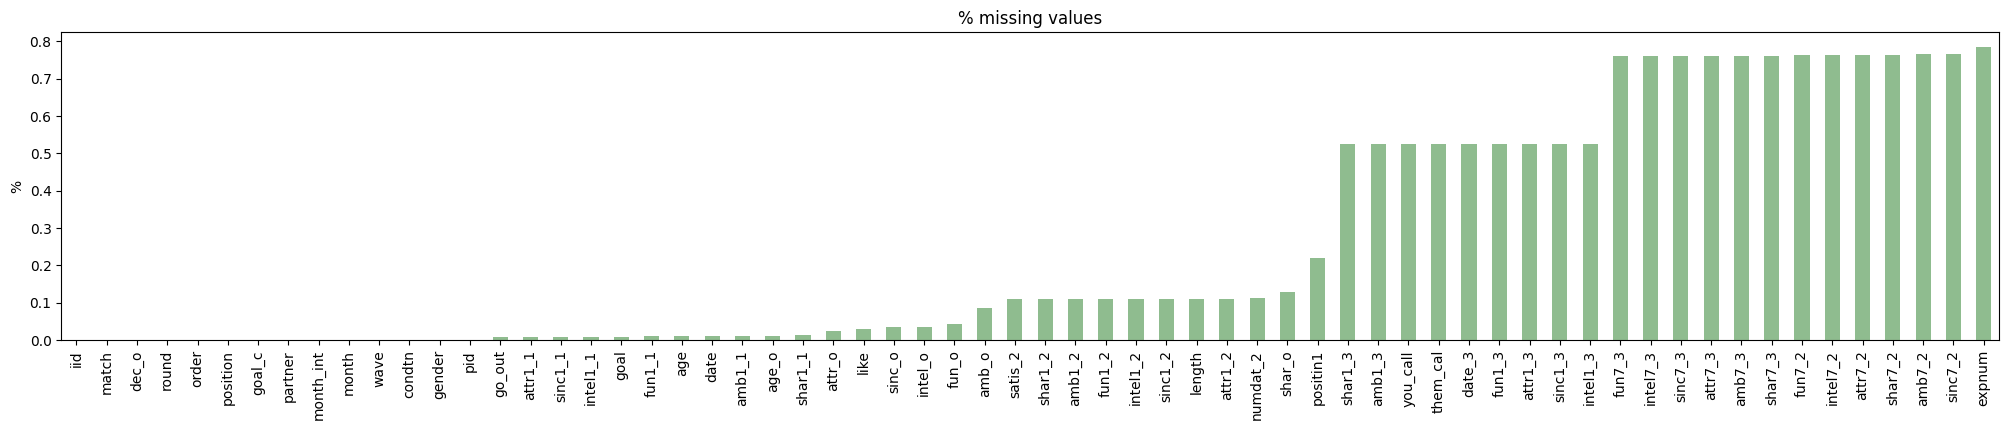

In [11]:
# visualisation données manquantes
tab.isna().mean().sort_values().plot(
    kind="bar", figsize=(25, 4), color= "darkseagreen",
    title="% missing values",
    ylabel="%")
plt.show()

In [12]:
# removing rows without age
tab = tab.loc[(tab["age"].isna() == False)]
tab.shape

(8283, 64)

### 1.1. data formating and calculation

In [13]:
# number of wave per month
nwave = tab.groupby("month_int")["wave"].unique().reset_index()
nwave["nb_of_wave"] = nwave["wave"].apply(lambda x : len(x))
nwave.rename(columns = {'wave':'list_of_waves'}, inplace = True)
nwave

,month_int,list_of_waves,nb_of_wave
0,2,"[15, 16, 17]",3
1,3,"[6, 7]",2
2,4,"[8, 9, 18, 19, 20, 21]",6
3,9,"[10, 11]",2
4,10,"[1, 2, 12, 13, 14]",5
5,11,"[3, 4, 5]",3


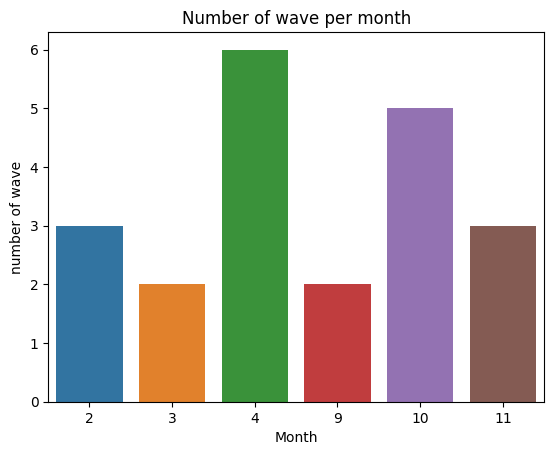

In [14]:
# number of wave per month
wm = sns.barplot(x="month_int", y="nb_of_wave", data=nwave)
wm.set(xlabel='Month',
       ylabel='number of wave',
       title='Number of wave per month')
plt.show()

In [15]:
# number of participants per month
npart = tab.value_counts("month_int").to_frame(name="nb_participant").reset_index()
display(npart)

,month_int,nb_participant
0,4,2552
1,10,2062
2,2,1060
3,9,1044
4,11,1008
5,3,557


#### data preparation

In [16]:
# transformation of the data for comparison
# per iid, calculation of the number of like, decision, match, you_call, them_cal and date

## order en percentage in regard of the number of partner met at the event
tab["order_per"] = 100 * tab["order"] / tab["round"]

In [17]:
# number of people met at the event
round = tab.groupby("iid")["round"].unique().explode().reset_index(name='nb_met_people')
#print("----- round -----")
#display(round)

# number of decision yes=1 or no=0 per person
prep = tab.groupby("iid")["dec_o"].value_counts().to_frame(name="nb_of_dec").reset_index()
dec = pd.pivot_table(prep, index='iid', columns='dec_o', values='nb_of_dec').reset_index()
dec.columns.name = None
dec.rename(columns = {1:'dec_Y', 0:'dec_N'}, inplace=True)
#print("----- dec -----")
#display(dec)

# number of match per person
prep = tab.groupby("iid")["match"].value_counts().to_frame(name="nb_of_match").reset_index()
match = pd.pivot_table(prep, index='iid', columns='match', values='nb_of_match').reset_index()
match.columns.name = None
match.rename(columns = {1:'match_Y', 0:'match_N'}, inplace=True)
#print("----- match -----")
#display(match)

# number of call per iid and if the iid got a date after the event 0=N 1=Y
var_to_extract = ["iid", "gender", "wave","month_int", "you_call", "them_cal", "date_3"]
rest = tab.loc[:, var_to_extract].drop_duplicates()
rest.rename(columns = {"you_call":"nb_youcall", "them_cal":"nb_themcall"}, inplace=True)
#print("----- rest -----")
#display(rest)

In [18]:
# merging
work = rest.merge(round, on="iid", how="left").merge(dec, on='iid', how="left").merge(match, on='iid', how="left")
work

,iid,gender,wave,month_int,nb_youcall,nb_themcall,date_3,nb_met_people,dec_N,dec_Y,match_N,match_Y
0,1,Men,1,10,1.0,1.0,0.0,10,5.0,5.0,6.0,4.0
1,2,Men,1,10,0.0,0.0,0.0,10,4.0,6.0,8.0,2.0
2,3,Men,1,10,NaN,NaN,NaN,10,5.0,5.0,10.0,NaN
3,4,Men,1,10,0.0,0.0,0.0,10,4.0,6.0,8.0,2.0
4,5,Men,1,10,0.0,0.0,0.0,10,7.0,3.0,8.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
538,548,Women,21,4,2.0,0.0,0.0,22,12.0,10.0,17.0,5.0
539,549,Women,21,4,1.0,0.0,0.0,22,12.0,10.0,17.0,5.0
540,550,Women,21,4,NaN,NaN,NaN,22,16.0,6.0,18.0,4.0
541,551,Women,21,4,NaN,NaN,NaN,22,12.0,10.0,20.0,2.0


In [19]:
# calculation of ratio
work["ratio_decN"] = work["dec_N"] / work["nb_met_people"]
work["ratio_decY"] = work["dec_Y"] / work["nb_met_people"]
work["ratio_matchN"] = work["match_N"] / work["nb_met_people"]
work["ratio_matchY"] = work["match_Y"] / work["nb_met_people"]
work["ratio_youcall"] = work["nb_youcall"] / work["match_Y"]
work["ratio_themcall"] = work["nb_themcall"] / work["match_Y"]
work["ratio_date3"] = work["date_3"] / work["match_Y"]

# replacement of null value by 0
newcol = ["ratio_decN", "ratio_decY", "ratio_matchN", "ratio_matchY", "ratio_youcall", "ratio_themcall", "ratio_date3"]
for c in newcol:
    work[c] = work[c].apply(lambda x : 0 if np.isnan(x) == True else x)

#display(work.head())
work.describe(include="all")

,iid,gender,wave,month_int,nb_youcall,nb_themcall,date_3,nb_met_people,dec_N,dec_Y,match_N,match_Y,ratio_decN,ratio_decY,ratio_matchN,ratio_matchY,ratio_youcall,ratio_themcall,ratio_date3
count,543.000000,543,543.000000,543.000000,262.000000,262.000000,262.000000,543.0,540.000000,522.000000,543.000000,445.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Women,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,274,NaN,NaN,NaN,NaN,NaN,83.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,277.331492,NaN,11.103131,6.642726,0.748092,0.889313,0.358779,NaN,8.918519,6.641762,12.745856,3.060674,0.574413,0.423243,0.829549,0.168107,0.140325,0.134537,0.067050
std,159.485256,NaN,6.011094,3.465350,1.732464,1.303973,0.480560,NaN,4.811939,4.008630,4.856792,2.173428,0.238775,0.239500,0.150065,0.149563,0.536337,0.280783,0.182115
min,1.000000,NaN,1.000000,2.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000
25%,141.500000,NaN,6.500000,4.000000,0.000000,0.000000,0.000000,NaN,5.000000,3.000000,9.000000,1.000000,0.400000,0.222222,0.755952,0.055556,0.000000,0.000000,0.000000
50%,277.000000,NaN,11.000000,4.000000,0.000000,0.000000,0.000000,NaN,8.000000,6.000000,13.000000,2.000000,0.600000,0.400000,0.857143,0.136364,0.000000,0.000000,0.000000
75%,415.500000,NaN,15.500000,10.000000,1.000000,1.000000,1.000000,NaN,13.000000,9.000000,17.000000,4.000000,0.777778,0.600000,0.944444,0.238095,0.000000,0.000000,0.000000


### 1.2. attribute checking

In [36]:
# wave and attributes information
a1 = tab.loc[tab["attr1_1"].isna() == False, "wave"].nunique()
a3 = tab.loc[tab["attr7_3"].isna() == False, "wave"].nunique()
print(f"number of wave where 1_1 was requested: {a1}")
print(f"number of wave where 7_3 was requested: {a3}")

w3 = tab.loc[tab["attr7_3"].isna() == False, "wave"].unique()
print(f"id of wave where 7_3 was requested: {w3}")

number of wave where 1_1 was requested: 21
number of wave where 7_3 was requested: 12
id of wave where 7_3 was requested: [10 11 12 13 14 15 16 17 18 19 20 21]


In [37]:
# checking attribut values
to_check1 = ["attr1_1", "sinc1_1", "intel1_1", "fun1_1", "amb1_1", "shar1_1"]
to_check5 = ["attr7_3", "sinc7_3", "intel7_3", "fun7_3", "amb7_3", "shar7_3"]

# creation of new columns
tab["total_1"] = tab.apply(lambda row : row[to_check1].sum(), axis=1)
tab["total_5"] = tab.apply(lambda row : row[to_check5].sum(), axis=1)


In [26]:
# to check how many rows have errors
tab.loc[(tab["total_1"]) != 100, "total_1"].value_counts()

100.01    239
99.99     199
100.01    127
100.00    110
100.02     92
99.99      82
90.00      65
100.00     56
100.02     56
99.98      26
120.00     25
110.00     22
95.00      22
99.99      16
148.00     10
101.00     10
Name: total_1, dtype: int64

In [41]:
# removing rows where total_1 == 0
tab = tab.loc[(tab["total_1"] != 0),:]
print(tab.shape)

## data transformation in the case of total != 100
to_check1 = ["attr1_1", "sinc1_1", "intel1_1", "fun1_1", "amb1_1", "shar1_1"]

for i in to_check1:
    new_name = "_".join([i, "cor"])
    tab[new_name] = 100 * tab[i] / tab["total_1"]

to_check1_bis = ["attr1_1_cor", "sinc1_1_cor", "intel1_1_cor", "fun1_1_cor", "amb1_1_cor", "shar1_1_cor"]

tab["total_1_bis"] = tab.apply(lambda row : row[to_check1_bis].sum(), axis=1)
print(tab.loc[(tab["total_1_bis"]) != 100, "total_1_bis"].value_counts())
ratio = 100*tab.loc[(tab["total_1_bis"]) != 100, "total_1_bis"].count() / tab.shape[0]
print(f"% error values: {ratio}")

(8267, 74)
100.0    240
100.0    224
100.0     70
100.0     31
Name: total_1_bis, dtype: int64
% error values: 6.8344018386355385


In [42]:
# to check how many rows have errors
tab.loc[(tab["total_5"]) != 100, "total_5"].value_counts()

0.0      6251
90.0       86
110.0      46
130.0      21
Name: total_5, dtype: int64

In [43]:
# not removing where it is == to 0
for i in to_check5:
    new_name = "_".join([i, "cor"])
    tab[new_name] = 100 * tab[i] / tab["total_5"]

to_check5_bis = ["attr7_3_cor", "sinc7_3_cor", "intel7_3_cor", "fun7_3_cor", "amb7_3_cor", "shar7_3_cor"]

tab["total_5_bis"] = tab.apply(lambda row : row[to_check5_bis].sum(), axis=1)
tab.loc[(tab["total_5_bis"]) != 100, "total_5_bis"].value_counts()


0.0      6251
100.0      30
100.0       7
Name: total_5_bis, dtype: int64

# 2. Participants profiles

##### age

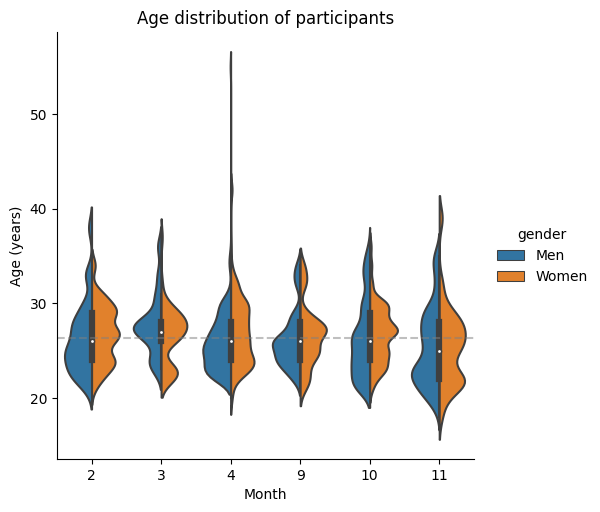

26.35962259586307


In [44]:
# age of the participants over the year
a = sns.catplot(x="month_int", y="age", data=tab, hue="gender", kind="violin", split=True)
a.refline(y = tab["age"].mean(), color = "grey", alpha=0.5)
a.set(xlabel='Month',
       ylabel='Age (years)',
       title='Age distribution of participants')
plt.show()

print(tab["age"].mean())

### 2.1 goal

In [45]:
# goal distribution per month
goalM = tab.groupby(["month_int"])["goal_c"].value_counts().to_frame(name="abundance_goal_month").reset_index()
#display(goalM.head())

# amout of people per gender, per month and per goal
ngoal = tab.groupby(["month_int", "gender"])["goal_c"].value_counts().to_frame(name="abundance_goal_gender").reset_index()
#display(ngoal.head())

# final dataframe
goal = ngoal.merge(goalM, how="left", on=["month_int", "goal_c"]).merge(npart, how="left", on="month_int")
goal["goalM_per"] = goal["abundance_goal_gender"] / goal["nb_participant"]
goal["goalM_gender_per"] = goal["abundance_goal_gender"] / goal["abundance_goal_month"]
#display(goal.head())

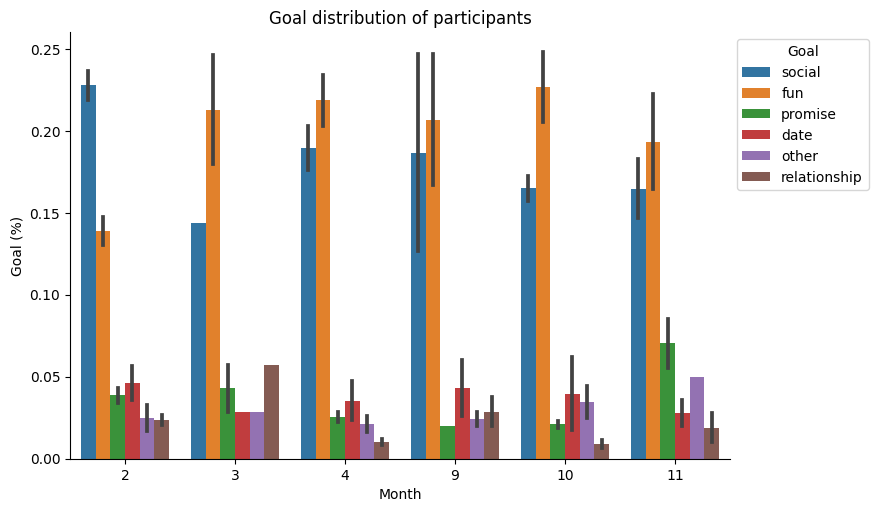

In [46]:
gc = sns.catplot(data=goal, x="month_int", y="goalM_per", hue="goal_c", kind="bar", height=5, aspect=1.5, legend=False)
plt.legend(title="Goal", bbox_to_anchor = (1,1))
gc.set(xlabel='Month',
       ylabel='Goal (%)',
       title='Goal distribution of participants')
plt.show()


### 2.2 social habits

In [47]:
# social habits per month
goutM = tab.groupby(["month_int"])["go_out"].value_counts().to_frame(name="abundance_gout_month").reset_index()
#display(goutM.head())
# amout of people per gender, per month and per social habit category
ngout = tab.groupby(["month_int", "gender"])["go_out"].value_counts().to_frame(name="abundance_gout_gender").reset_index()
#display(ngout.head())

# final dataframe
gout = ngout.merge(goutM, how="left", on=["month_int", "go_out"]).merge(npart, how="left", on="month_int")
gout["goutM_per"] = gout["abundance_gout_gender"] / gout["nb_participant"]
gout["goutM_gender_per"] = gout["abundance_gout_gender"] / gout["abundance_gout_month"]
#display(goal.head())

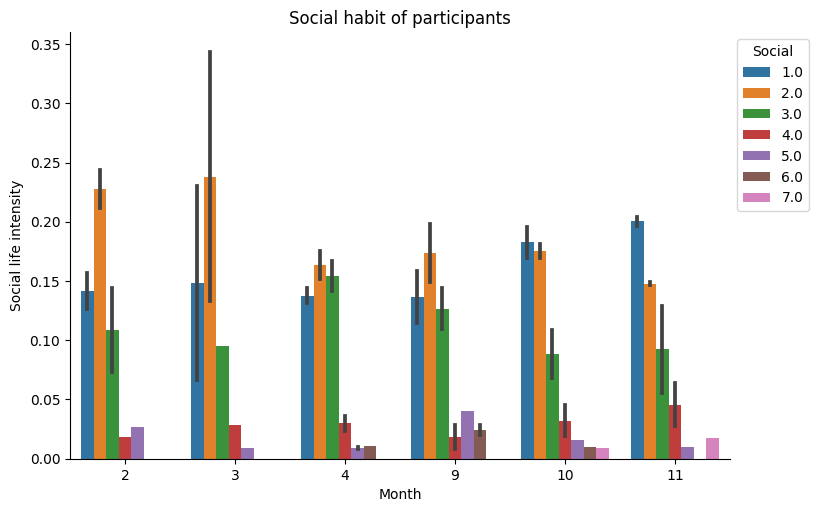

In [48]:
# Social habits (go_out, date) per month
#	Several times a week=1
#	Twice a week=2
#	Once a week=3
#	Twice a month=4
#	Once a month=5
#	Several times a year=6
#	Almost never=7

go = sns.catplot(data=gout, x="month_int", y="goutM_per", hue="go_out", kind="bar", height=5, aspect=1.5, legend=False)
plt.legend(title="Social", bbox_to_anchor = (1,1))
go.set(xlabel='Month',
       ylabel='Social life intensity',
       title='Social habit of participants')
plt.show()

### 2.3 Attibutes importance

#### 2.3.1. Before speed dating/ what participant looks for?

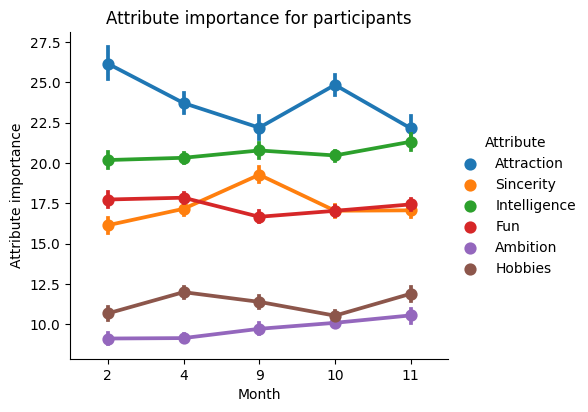

In [49]:
# intra-annual trend of attribut importance
var_to_reshape = ["wave", "month_int", "attr1_1_cor", "sinc1_1_cor", "intel1_1_cor", "fun1_1_cor", "amb1_1_cor", "shar1_1_cor"]
prep = tab.loc[-(tab["wave"].isin([6,7,8,9])), var_to_reshape]
#display(prep)
first = pd.melt(prep, id_vars='month_int', value_vars=["attr1_1_cor", "sinc1_1_cor", "intel1_1_cor", "fun1_1_cor", "amb1_1_cor", "shar1_1_cor"])
first.rename(columns = {'variable':'Attribute', 'value':'importance'}, inplace = True)
first["Attribute"] = first["Attribute"].apply(lambda x : "Attraction" if x == "attr1_1_cor"
                                                                      else "Sincerity" if x == "sinc1_1_cor"
                                                                      else "Intelligence" if x == "intel1_1_cor"
                                                                      else "Fun" if x == "fun1_1_cor"
                                                                      else "Ambition" if x == "amb1_1_cor"
                                                                      else "Hobbies")

attrib = sns.catplot(data=first, x="month_int", y="importance", hue="Attribute", kind="point", height=4, aspect=1.2)
attrib.set(xlabel='Month',
           ylabel='Attribute importance',
           title='Attribute importance for participants')
plt.show()


#### 2.3.2 3-4 weeks after the speed dating: what's motivated the decision?

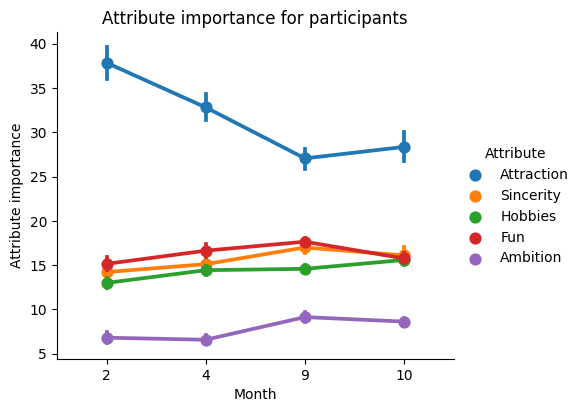

In [50]:
# intra-annual trend of attribut importance
var_to_reshape = ["wave", "month_int", "attr7_3_cor", "sinc7_3_cor", "intel7_3_cor", "fun7_3_cor", "amb7_3_cor", "shar7_3_cor"]
prep = tab[var_to_reshape]
prep = prep.loc[prep["attr7_3_cor"].isna() == False]
#display(prep)
second = pd.melt(prep, id_vars='month_int', value_vars=["attr7_3_cor", "sinc7_3_cor", "intel7_3_cor", "fun7_3_cor", "amb7_3_cor", "shar7_3_cor"])
second.rename(columns = {'variable':'Attribute', 'value':'importance'}, inplace = True)
second["Attribute"] = second["Attribute"].apply(lambda x : "Attraction" if x == "attr7_3_cor"
                                                                      else "Sincerity" if x == "sinc7_3_cor"
                                                                      else "Intelligence" if x == "intel7_32_cor"
                                                                      else "Fun" if x == "fun7_3_cor"
                                                                      else "Ambition" if x == "amb7_3_cor"
                                                                      else "Hobbies")

attrib2 = sns.catplot(data=second, x="month_int", y="importance", hue="Attribute", kind="point", height=4, aspect=1.2)
attrib2.set(xlabel='Month',
            ylabel='Attribute importance',
            title='Attribute importance for participants')
plt.show()

# 3. Wave characteristics: speed dating process

### pickiness trend

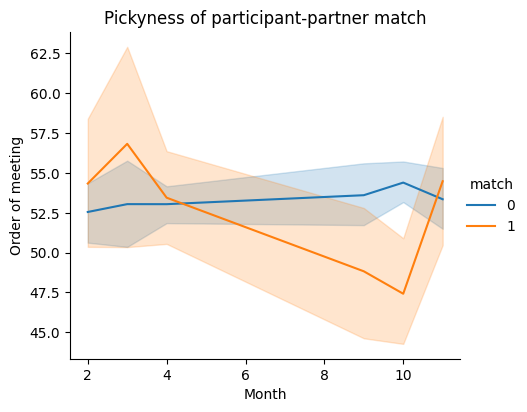

In [51]:
# pickyness of the participant to desire a match with partner
p = sns.relplot(data=tab, x="month_int", y="order_per", hue="match", kind="line", height=4, aspect=1.2)
p.set(xlabel='Month',
       ylabel='Order of meeting',
       title='Pickyness of participant-partner match')
plt.show()

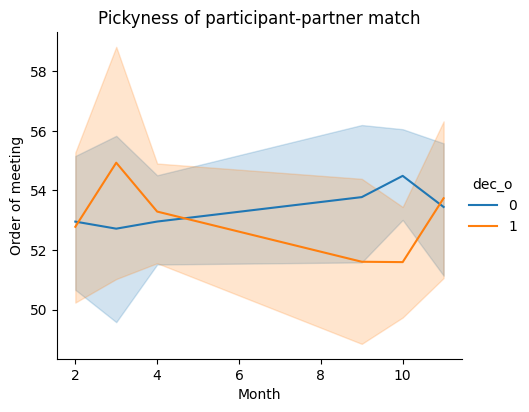

In [52]:
# pickyness of the participant to desire a match with partner
p = sns.relplot(data=tab, x="month_int", y="order_per", hue="dec_o", kind="line", height=4, aspect=1.2)
p.set(xlabel='Month',
       ylabel='Order of meeting',
       title='Pickyness of participant-partner match')
plt.show()

### decision trend

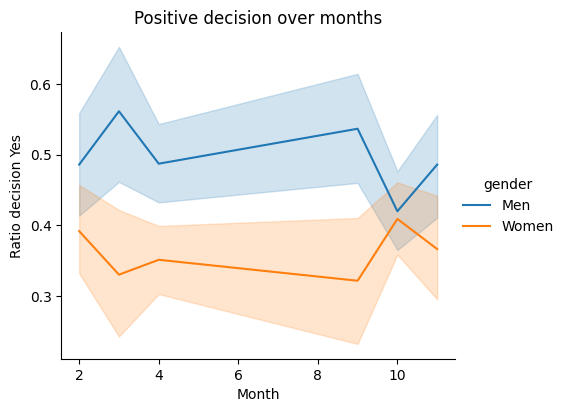

In [53]:
## how many man and woman would like to date with their partner at the event over the year
dy = sns.relplot(data=work, x="month_int", y="ratio_decY", hue="gender", kind="line", height=4, aspect=1.2)
dy.set(xlabel='Month',
       ylabel='Ratio decision Yes',
       title='Positive decision over months')
plt.show()

### match trend

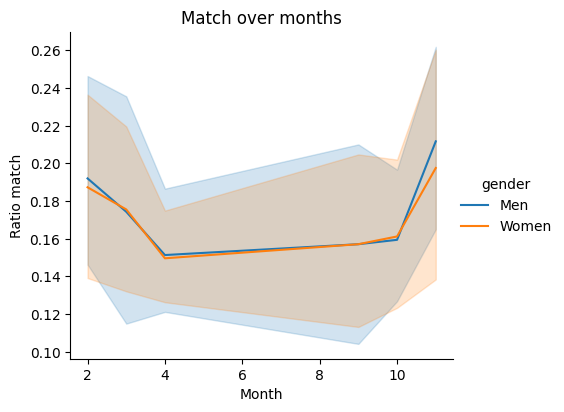

In [54]:
## how many man and woman would like to date with their partner at the event over the year
my = sns.relplot(data=work, x="month_int", y="ratio_matchY", hue="gender", kind="line", height=4, aspect=1.2)
my.set(xlabel='Month',
       ylabel='Ratio match',
       title='Match over months')
plt.show()

### after event

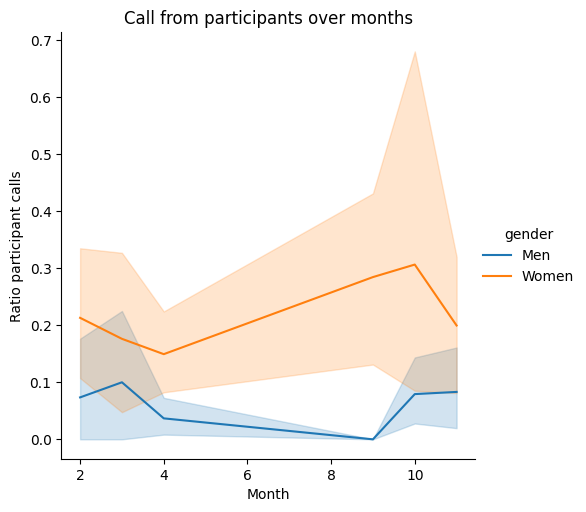

In [55]:
## how much iid called their partner
yc = sns.relplot(data=work, x="month_int", y="ratio_youcall", hue="gender", kind="line")
yc.set(xlabel='Month',
       ylabel='Ratio participant calls',
       title='Call from participants over months')
plt.show()

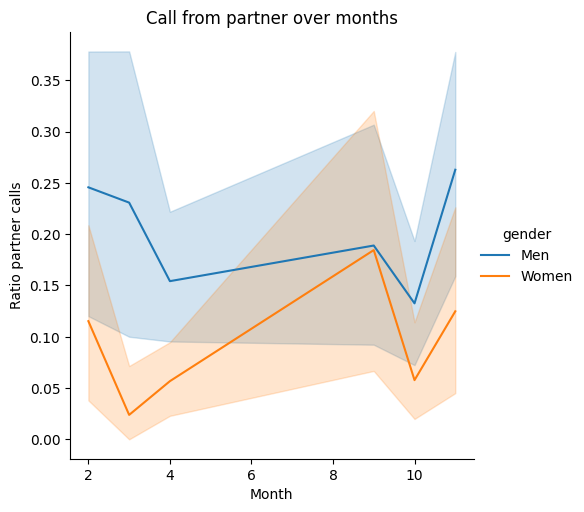

In [56]:
## how much patner call and not the iid
tc = sns.relplot(data=work, x="month_int", y="ratio_themcall", hue="gender", kind="line")
tc.set(xlabel='Month',
       ylabel='Ratio partner calls',
       title='Call from partner over months')
plt.show()

### Date 3-4 weeks after

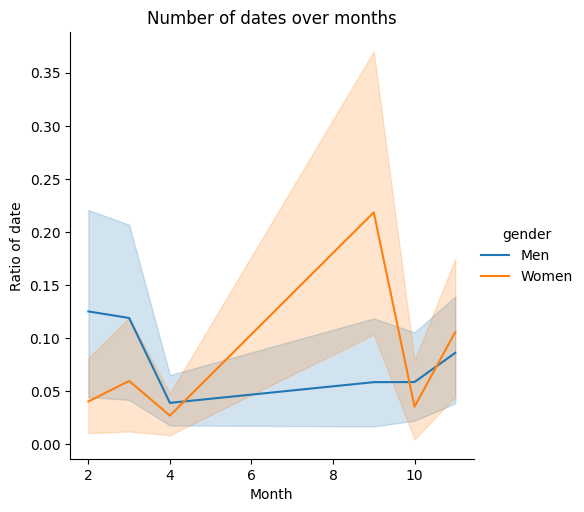

In [57]:
## how much patner call and not the iid
d3 = sns.relplot(data=work, x="month_int", y="ratio_date3", hue="gender", kind="line")
d3.set(xlabel='Month',
       ylabel='Ratio of date',
       title='Number of dates over months')
plt.show()

# 4. Analysis of the relationship between decisions, match, date and calls

#### preplots

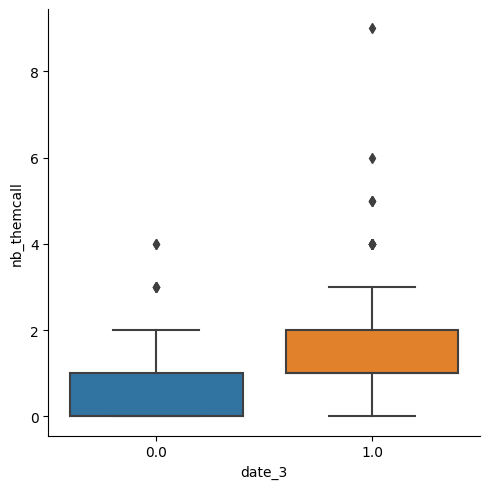

In [58]:
sns.catplot(data=work, y="nb_themcall", x="date_3", kind="box");

#### Heatmap of speed dating process

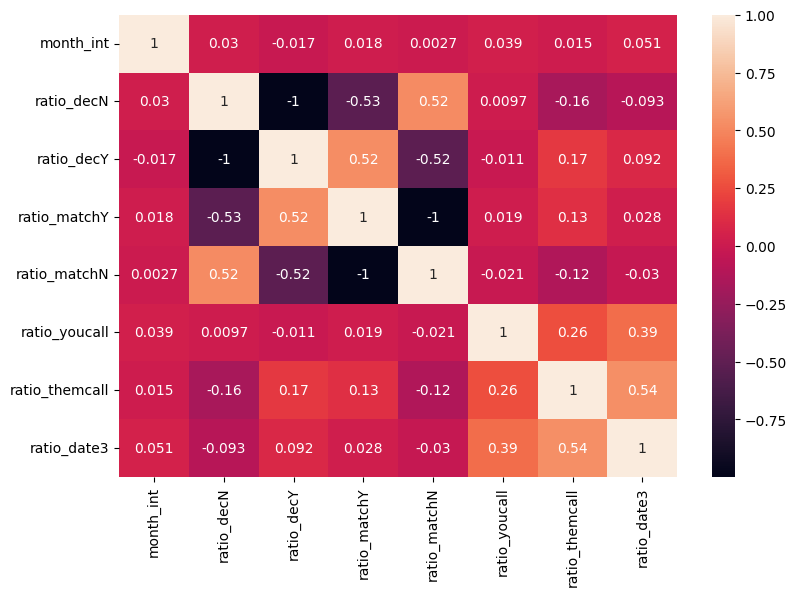

In [59]:
var_to_test = ["month_int", "gender", "ratio_decN", "ratio_decY", "ratio_matchY", "ratio_matchN", "ratio_youcall", "ratio_themcall", "ratio_date3"]
corr = work[var_to_test].corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(corr, annot=True, ax=ax, fmt='.2g');

# 5. Attributs looked for and their contribution to decisions and dates

<AxesSubplot: >

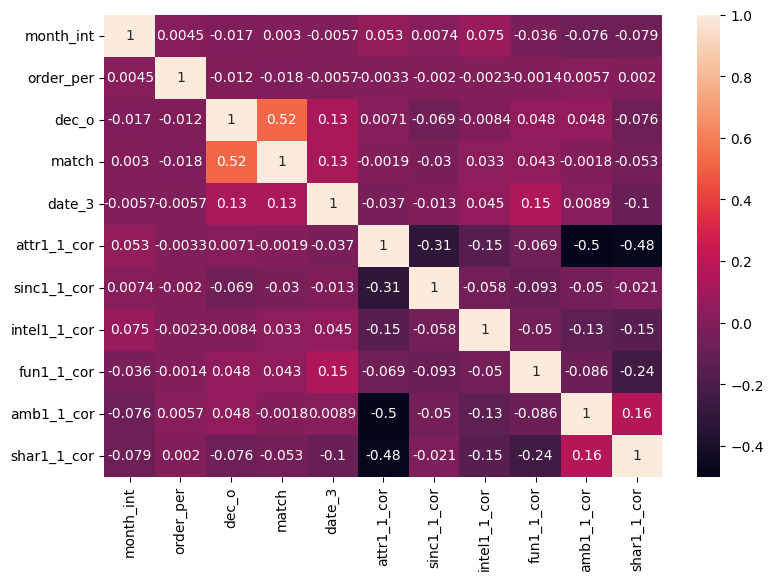

In [60]:
# before event
var_to_test = ["month_int", "gender", "order_per", "dec_o", "match", "date_3",
                "attr1_1_cor", "sinc1_1_cor", "intel1_1_cor", "fun1_1_cor", "amb1_1_cor", "shar1_1_cor"]
corr1 = tab[var_to_test].corr(method = 'spearman')
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(corr1, annot=True, ax=ax, fmt='.2g')

<AxesSubplot: >

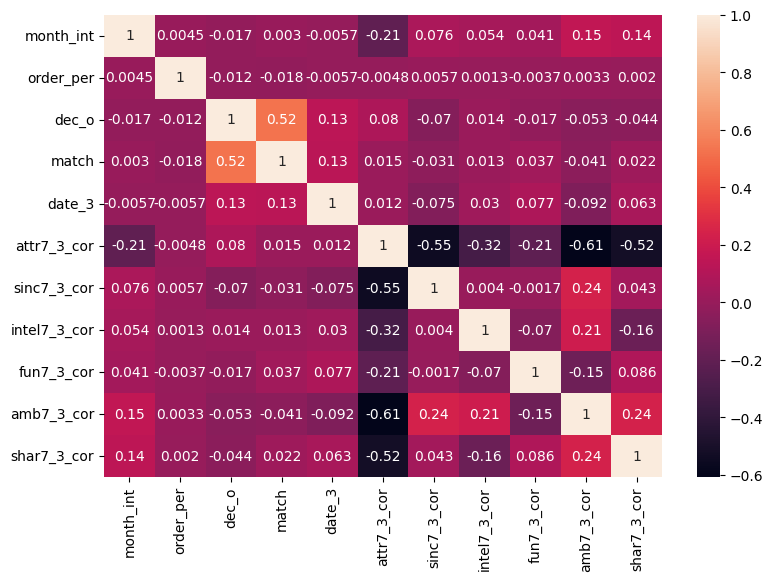

In [61]:
# 3-4 weeks after the event
var_to_test = ["month_int", "gender", "order_per", "dec_o", "match", "date_3",
                "attr7_3_cor", "sinc7_3_cor", "intel7_3_cor", "fun7_3_cor", "amb7_3_cor", "shar7_3_cor"]
#corr2 = tab.loc[-(tab["wave"].isin([6,7,8,9])), var_to_test].corr(method = 'spearman')
corr2 = tab[var_to_test].corr(method = 'spearman')
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(corr2, annot=True, ax=ax, fmt='.2g')